In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

In [70]:
def lrelu(x, alpha=0.01):
    return np.maximum(alpha*x,x)

In [71]:
a=6.12

In [196]:
def HCAL_act(x):
    

    return lrelu(np.minimum(2.+0.01*x,x))
    
    
    

In [197]:
HCAL_act(0)

0.0

In [198]:
np_HCAL_act = np.vectorize(HCAL_act)

<BarContainer object of 200 artists>

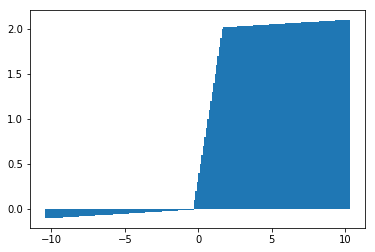

In [199]:
plt.bar(np.arange(-10,10,0.1),np_HCAL_act(np.arange(-10,10,0.1)))

In [7]:
def d_HCAL_act(x):
    num = np.multiply(a,np.exp(np.add(a,-x)))
    den = np.square(np.add(1, np.exp(np.add(a,-x))))
    return num/den

In [8]:
np_d_HCAL_act = np.vectorize(d_HCAL_act)

<BarContainer object of 300 artists>

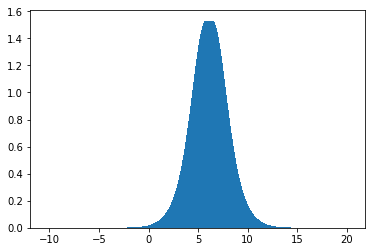

In [9]:
plt.bar(np.arange(-10,20,0.1),np_d_HCAL_act(np.arange(-10,20,0.1)))

In [11]:
np_d_HCAL_act_32 = lambda x: np_d_HCAL_act(x).astype(np.float32)

In [12]:
def tf_d_HCAL_act(x,name=None):
    with tf.name_scope(name, "d_HCAL_act", [x]) as name:
        y = tf.py_func(np_d_HCAL_act_32,
                        [x],
                        [tf.float32],
                        name=name,
                        stateful=False)
        return y[0]

In [13]:
def py_func(func, inp, Tout, stateful=True, name=None, grad=None):

    # Need to generate a unique name to avoid duplicates:
    rnd_name = 'PyFuncGrad' + str(np.random.randint(0, 1E+8))

    tf.RegisterGradient(rnd_name)(grad)  # see _MySquareGrad for grad example
    g = tf.get_default_graph()
    with g.gradient_override_map({"PyFunc": rnd_name}):
        return tf.py_func(func, inp, Tout, stateful=stateful, name=name)

In [14]:
def HCAL_grad(op, grad):
    x = op.inputs[0]

    n_gr = tf_d_HCAL_act(x)
    return grad * n_gr 

In [15]:
np_HCAL_act_32 = lambda x: np_HCAL_act(x).astype(np.float32)

def tf_HCAL_act(x, name=None):

    with tf.name_scope(name, "HCAL_act", [x]) as name:
        y = py_func(np_HCAL_act_32,
                        [x],
                        [tf.float32],
                        name=name,
                        grad=HCAL_grad)  # <-- here's the call to the gradient
        return y[0]

In [2]:
def tf_HCAL_act(x):
    a=6.12
    arg=tf.cast(-x,tf.float32)
    return tf.divide(a,tf.add(1.,tf.exp(tf.add(a,arg))))

In [3]:
with tf.Session() as sess:

    x = tf.constant(np.arange(-10,10,1.))
    y = tf_HCAL_act(x)
    tf.initialize_all_variables().run()

    print(x.eval(), y.eval(), tf.gradients(y, [x])[0].eval())


Instructions for updating:
Use `tf.global_variables_initializer` instead.
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.] [6.1083620e-07 1.6604231e-06 4.5134962e-06 1.2268938e-05 3.3350316e-05
 9.0654714e-05 2.4641879e-04 6.6978938e-04 1.8203339e-03 4.9456530e-03
 1.3425037e-02 3.6355998e-02 9.7827286e-02 2.5881341e-01 6.5586865e-01
 1.5055892e+00 2.8766201e+00 4.3257518e+00 5.3097801e+00 5.7947154e+00] [6.10836139e-07 1.66042264e-06 4.51349297e-06 1.22689135e-05
 3.33501339e-05 9.06533678e-05 2.46408861e-04 6.69716042e-04
 1.81979244e-03 4.94165625e-03 1.33955870e-02 3.61400247e-02
 9.62635279e-02 2.47868240e-01 5.85580468e-01 1.13519740e+00
 1.52450514e+00 1.26821423e+00 7.02955782e-01 3.07995707e-01]
